# LAB 4 - REGRESSION WITH NEURAL NETWORKS

### Wine Quality Prediction using Neural Networks

Data - wine quality data from kaggle  : [wine quality data](https://https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data)

This lab work consist of 9 steps we followed from the importing and loading dependencies through testing the trained model

- Step 1.  Import all dependencies
- Step 2.  Load the data
- Step 3.  Heat map to show relationship between Features
- Step 4.  Split the data into train and test set
- Step 5.  Standardization
- Step 6.  Build the Neural Network Architecture
- Step 7.  The Fun part, my Favourite. Train the model
- Step 8.  Visualize the training and Validation loss
- Step 9.  Test the model on unseen metrics, 3 metrics in this case

### Step 1

Import all the needed libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import keras_tuner as kt
from tensorflow import keras
import tensorflow as tf

2024-11-05 20:07:49.629920: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2


Load the data from the source and show a few rows of the dataframe. 

Then check a some basic statistics about the data using the .describe() method of the dataframe class

We can also check for the data types and missing values if any by using the .info() method.

In [2]:
wine_data = pd.read_csv('/Users/macbookpro/Desktop/neural_nets/WineQT.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Step 3


Plot a heatmap to show the relationship and correlation that exists between features

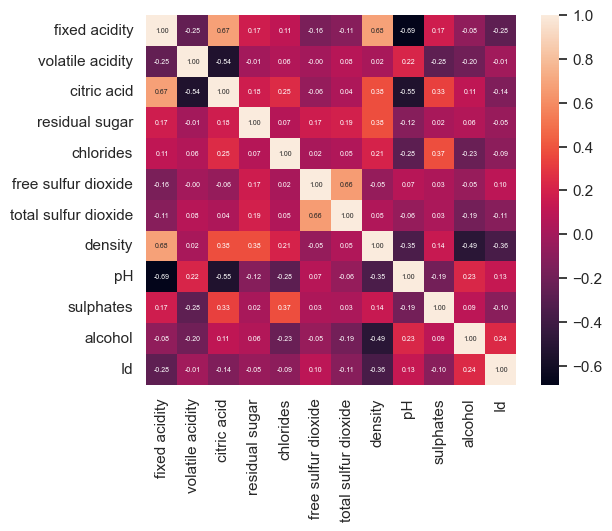

In [5]:
# compute  the  correlation coeffient
# drop the quality from the dataframe
features = wine_data.drop(columns=['quality'], axis=1).columns
cmap = np.corrcoef(wine_data[features].values.T)

sns.set_theme()


fig, ax = plt.subplots(sharex=True,
                       sharey=True)
hm = sns.heatmap(cmap,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':5},
                 yticklabels=features,
                 xticklabels=features)


plt.show()

### Step 4

Split the data into two sets. 

The X data contains all the features that will be used for training

The y contains the target we're interested in.

The train set contains 80 % of the data

The Test set contains 20 % of the data.

In [6]:
X = wine_data.drop(columns=['quality'],axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Step 5

##### Standardization

Bring all the variables to a common scale, using a mean of 0 and a standard deviation of 1

In [7]:
# create an instance of the StandardScaler class
scaler = StandardScaler()
scaler.fit(X_train) # this helps in getting the distribution of the  data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Step 6


Build the neural network arhitecture.

The architecture consist of:
1. input layer
2. 2 hidden layers
3. activation function used is relu for all layers except the last layer. this is  so because we're working with regression model
4. for backpropagation and optimization, we use the mean squared error as the loss function, and adam optimizer

In [8]:
model = Sequential()
model.add(Dense(128, activation='relu')) # input layer
model.add(Dense(256, activation='relu')) # first hidden layer
model.add(Dense(256, activation='relu')) # second hidden layer
model.add(Dense(1, activation='linear')) # output layer


# compute the loss
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'mse'])


#### Step 7


The Fun part. Train the model!

While training, we set out 20% of the training data for validation.

We start with  an epoch of 20

In [9]:
# Train the neural network
train_model = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs = 20
                        )

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 16.9832 - mae: 3.6493 - mse: 16.9832 - val_loss: 3.8880 - val_mae: 1.6389 - val_mse: 3.8880
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4058 - mae: 1.5337 - mse: 3.4058 - val_loss: 2.2410 - val_mae: 1.2149 - val_mse: 2.2410
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6543 - mae: 1.0203 - mse: 1.6543 - val_loss: 1.7771 - val_mae: 1.0863 - val_mse: 1.7771
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2850 - mae: 0.9012 - mse: 1.2850 - val_loss: 1.5862 - val_mae: 1.0069 - val_mse: 1.5862
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0389 - mae: 0.8116 - mse: 1.0389 - val_loss: 1.3583 - val_mae: 0.9366 - val_mse: 1.3583
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9686 - mae: 0.7868 - mse: 0.9686 - val_loss: 1.2499 - val_mae: 0.8890 - val_mse: 1.2499
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8075 - mae: 0.7074 - mse: 0.8075 - val_loss: 1.

### Step 8

Visualize the training and Validation loss

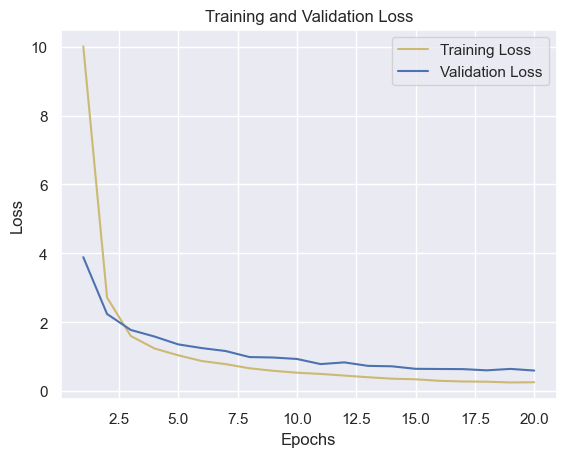

In [10]:
# let's get graphical
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Step 9

The final step. We test how our model performs on unseen data. 

Here we use 3 metrics

In [11]:
# test the accuracy of the model
preds = model.predict(X_test)

# compute error on test set
mae = mean_absolute_error(y_test, preds)
root_mean = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

# print the errors
print(f"Mean absolute error:  {mae}")
print(f"root mean squared error:  {root_mean}")
print(f"r2_score:  {r2}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean absolute error:  0.582581949025783
root mean squared error:  0.8359990639663859
r2_score:  -0.07423412799835205


### Experiment with Keras Tunner

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import kerastuner as kt

def build_model(hp):
  model = Sequential()
  model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
  model.add(Dense(1))  # Output layer for regression

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='mean_squared_error', metrics=['mean_absolute_error'])

  return model

tuner = kt.Hyperband(
    build_model,
    objective='val_mean_absolute_error',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='regression_tuner')

tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Reloading Tuner from my_dir/regression_tuner/tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.01.



/var/folders/y5/5kc5fqvn2tncnl_868zg4zhr0000gn/T/ipykernel_74394/511153938.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [13]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_new = tuner.hypermodel.build(best_hps)
history = model_new.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['mean_absolute_error']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50


/Users/macbookpro/Desktop/neural_nets/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 12.2460 - mean_absolute_error: 2.8543 - val_loss: 2.1953 - val_mean_absolute_error: 1.1800
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6845 - mean_absolute_error: 1.0172 - val_loss: 1.7492 - val_mean_absolute_error: 1.0489
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1232 - mean_absolute_error: 0.8485 - val_loss: 1.3505 - val_mean_absolute_error: 0.9357
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9042 - mean_absolute_error: 0.7565 - val_loss: 1.0123 - val_mean_absolute_error: 0.8016
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6686 - mean_absolute_error: 0.6464 - val_loss: 0.8240 - val_mean_absolute_error: 0.7183
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5684 - mean_absolute_error: 0.6040 - val_loss: 0.7310 - val_mean_absolute_error: 0.6894
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6014 - mean_absolute_error: 0.6134 - val_loss: 0.6504 - val_m

In [14]:
print('Best epoch: %d' % (best_epoch,))

Best epoch: 1


In [15]:
# test the accuracy of the model
preds_new = model_new.predict(X_test)

# compute error on test set
mae_new = mean_absolute_error(y_test, preds_new)
root_mean_new = root_mean_squared_error(y_test, preds_new)
r2_new = r2_score(y_test, preds_new)

# print the errors
print(f"Mean absolute error:  {mae_new}")
print(f"root mean squared error:  {root_mean_new}")
print(f"r2_score:  {r2_new}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean absolute error:  0.5136512169150806
root mean squared error:  0.7058528127180633
r2_score:  0.2341994047164917
